In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/titanic.csv')
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
546,547,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19.0,1,0,2908,26.00,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


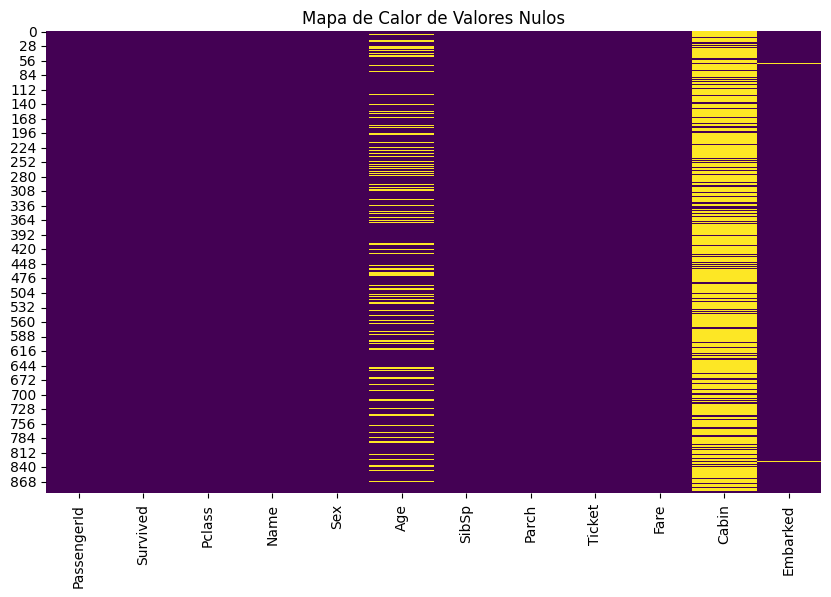

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que tu dataframe se llama 'df'
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

plt.title('Mapa de Calor de Valores Nulos')

# Guardar el gráfico como un archivo PNG
plt.savefig('output.png', format='png')

# Mostrar el gráfico
plt.show()

In [5]:
missing_values_percentage = df.isnull().mean() * 100
missing_values_percentage = missing_values_percentage.round(2).sort_values(ascending=False)
print(missing_values_percentage)

Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Name            0.00
Pclass          0.00
Survived        0.00
Sex             0.00
Parch           0.00
SibSp           0.00
Fare            0.00
Ticket          0.00
dtype: float64


<BarContainer object of 12 artists>

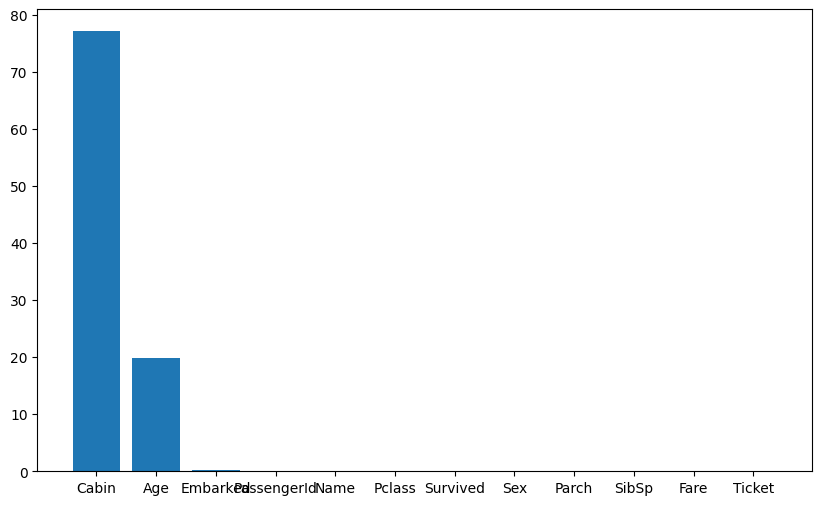

In [6]:
plt.figure(figsize=(10, 6))
plt.bar(x=missing_values_percentage.index, height= missing_values_percentage.values)

In [7]:
df.drop('Cabin', axis = 1, inplace = True)

In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [11]:
# Calcular la media de la columna Age
mean_age = df['Age'].mean()

# Imputar los valores nulos con la media
df.Age = df['Age'].fillna(mean_age)

In [13]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [14]:
round(df.isnull().sum().sort_values(ascending = False) / len(df) * 100, 2)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.drop('Name', axis = 1, inplace = True)
df.drop('Ticket', axis = 1, inplace = True)
df.drop('PassengerId', axis = 1, inplace = True)

In [18]:
print(f"Después de limpiar df: {df.shape[0]} filas y {df.shape[1]} columnas.")

Después de limpiar df: 891 filas y 8 columnas.


In [19]:
df.to_csv('./data/titanic_clean.csv', index=False)